### Overview Dataset

"Data Komponen Beton".

Data set ini berisikan beberapa kategori sebagai berikut
* cement (kg)
* slag (blast furnace slag, kg)
* ash (fly ash, kg)
* water (kg)
* superplastic (superplasticizer, kg)
* coarseagg (coarse aggregate, kg)
* fineagg (fine aggregate, kg)
* age (days, 1-365)
* strength (Concrete compressive strength, MPa)

# Exploratory Data Analysis (EDA)
Muhammad Azfar Wisnu - 50420803 - 2IA02

# Instruksi Tugas Praktikum FIKTI dan FTI

1. Buat univariate dan bivariate analysis untuk data set di atas
2. Jelaskan kesimpulan yang bisa di ambil dari analysis yg anda lakukan


<a id="1"></a>

# 1. Pengambilan Data:

## 1.1 Import packages

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

## 1.2 Import data

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv")
data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [5]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

# 2. EDA

## 2.1.Univariate analysis
<a id="2"></a>

## 2.1.1 [Component Name]

### **i.	Distribusi**

grafik distribusi cement


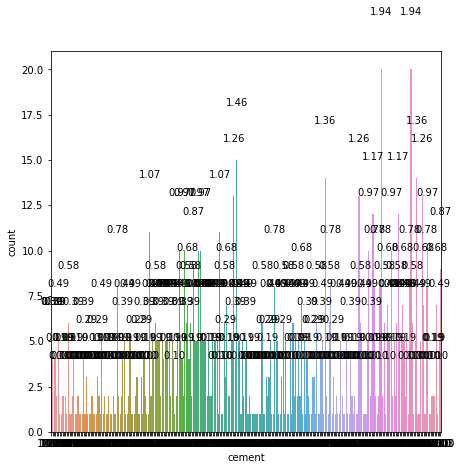

grafik distribusi slag


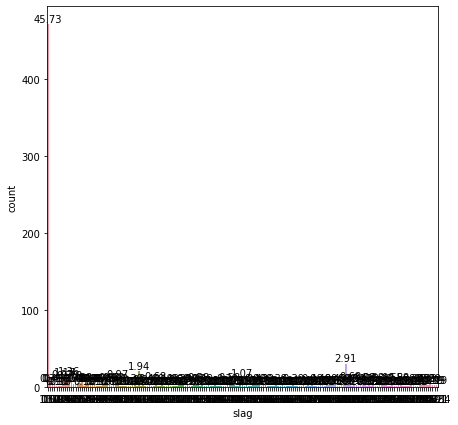

grafik distribusi ash


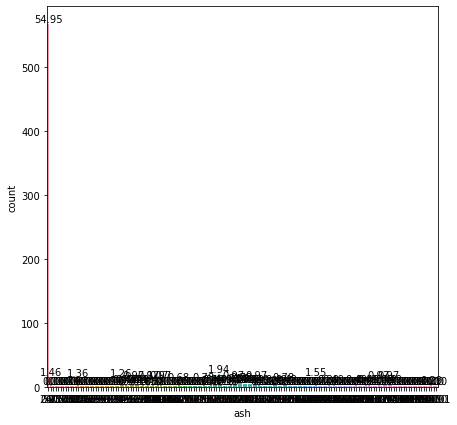

grafik distribusi water


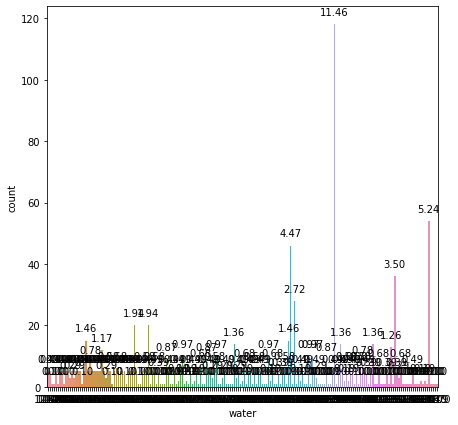

grafik distribusi superplastic


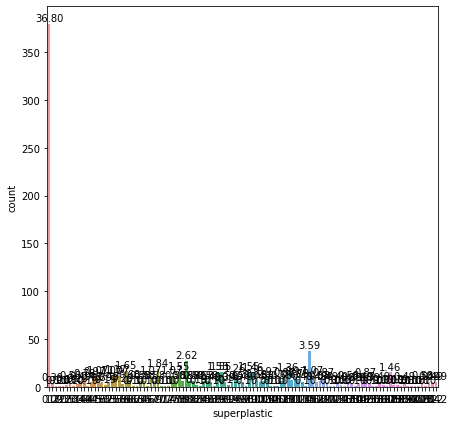

grafik distribusi coarseagg


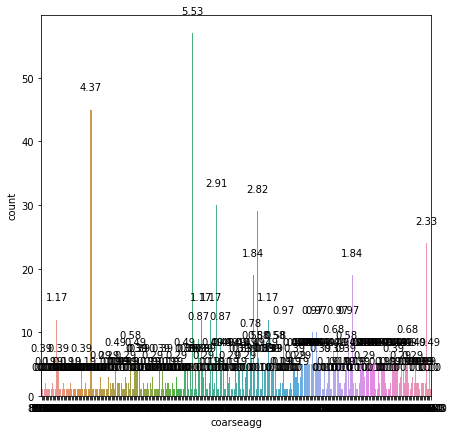

grafik distribusi fineagg


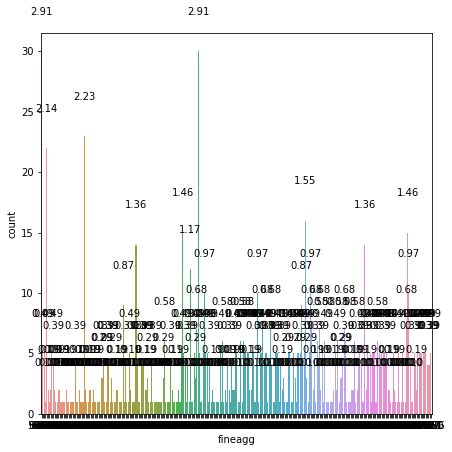

grafik distribusi age


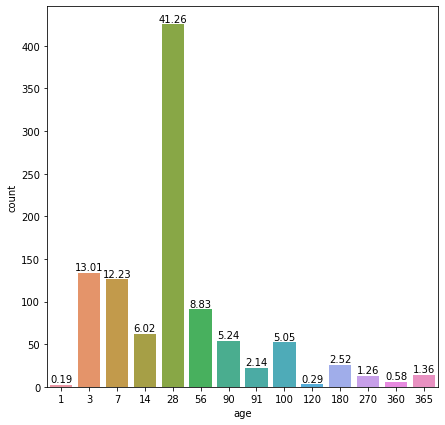

grafik distribusi strength


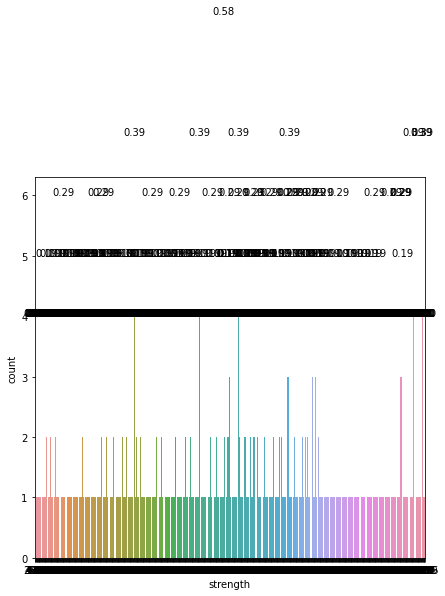

In [6]:
# Buat diagram di sini
#karena tidak diketahui component name mana yang diminta maka saya pikir memunculkan semua component data yang ada
for nameColumn in data.columns:
  plt.figure(figsize=(7,7))
  total = float(len(data))

  print("grafik distribusi", nameColumn)
  ax = sns.countplot(x=nameColumn, data=data)
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
  plt.show()

### **ii.	Deskripsi**

Jelaskan diagram di atas

<a id="3"></a>
# 2.2.Bivariate analysis

## 2.2.1 [Component Name]

### i. **Boxplot**

Box plot cement cement


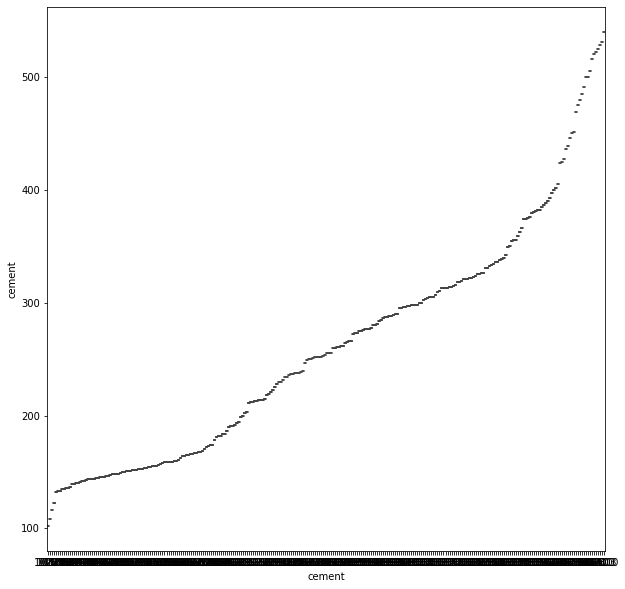

Box plot cement slag


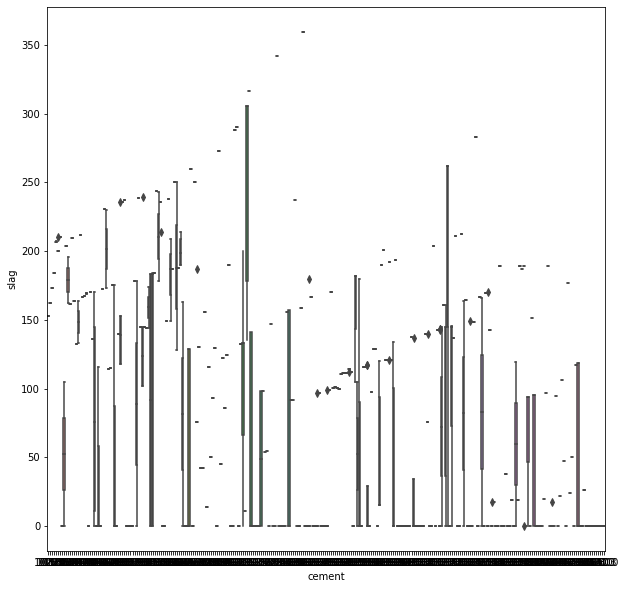

Box plot cement ash


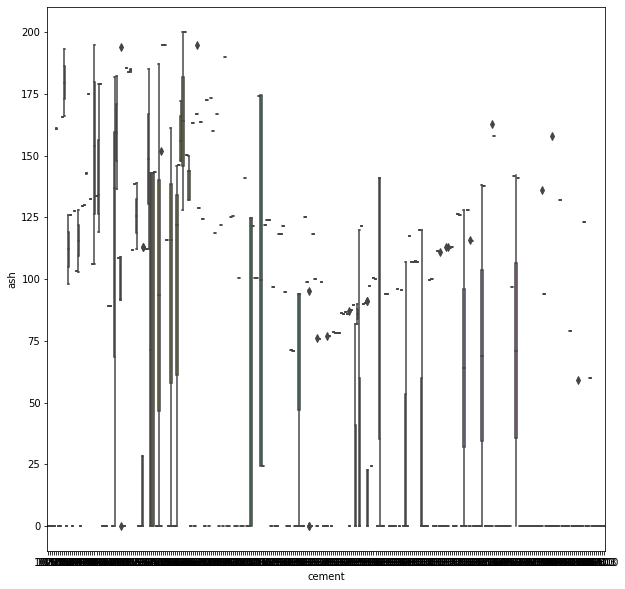

Box plot cement water


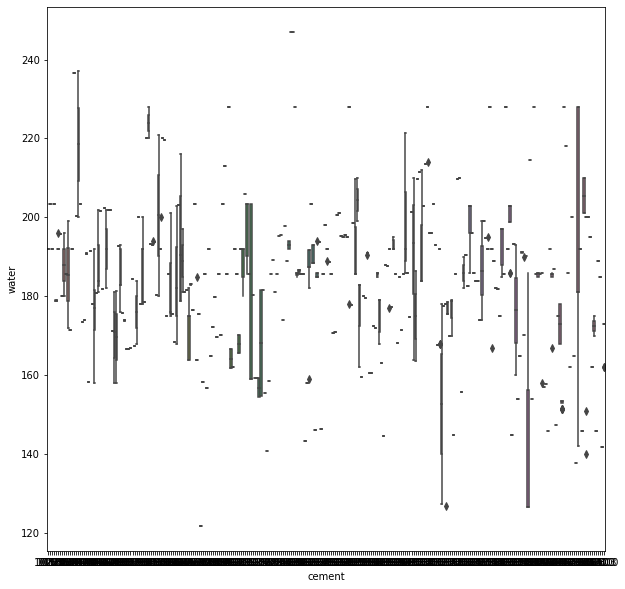

Box plot cement superplastic


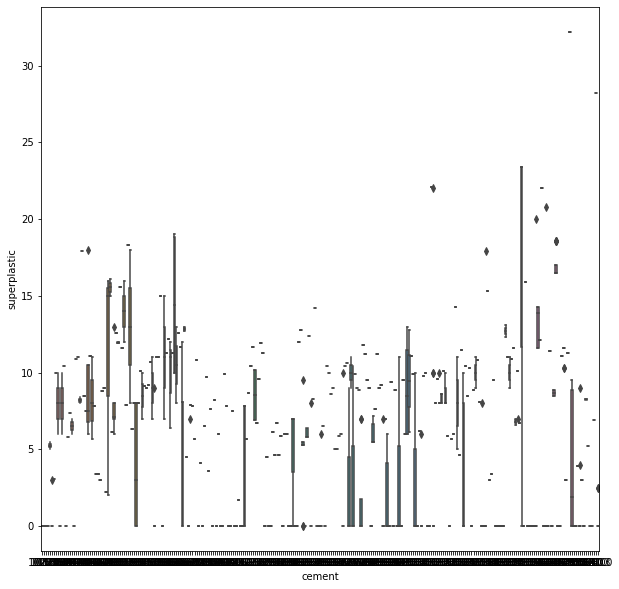

Box plot cement coarseagg


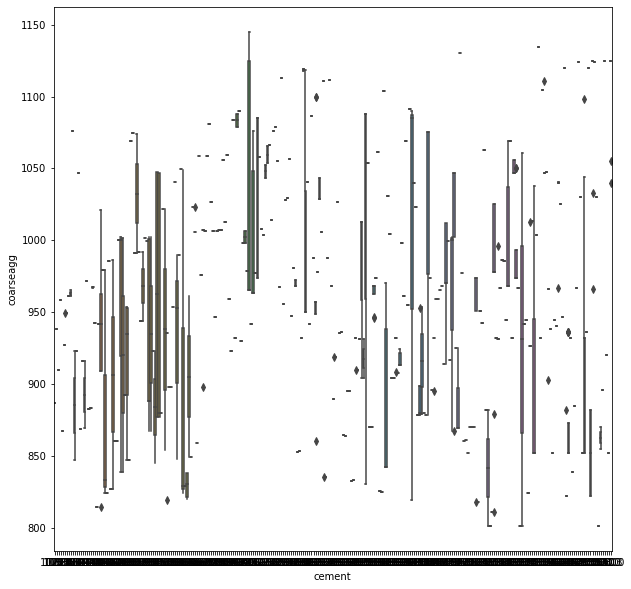

Box plot cement fineagg


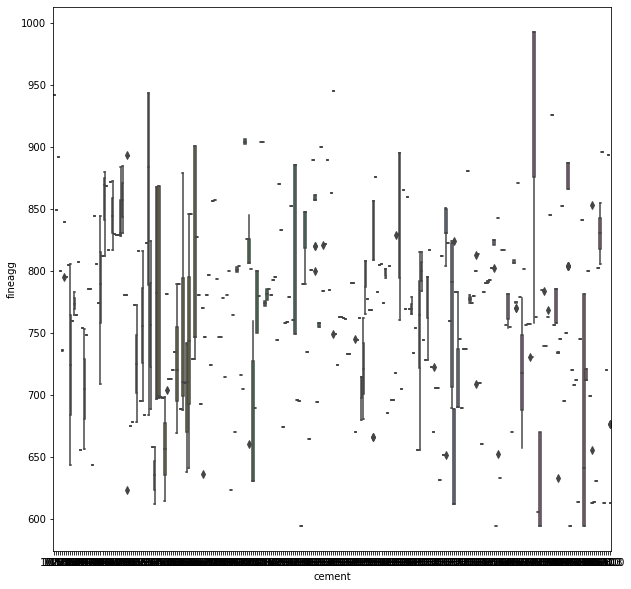

Box plot cement age


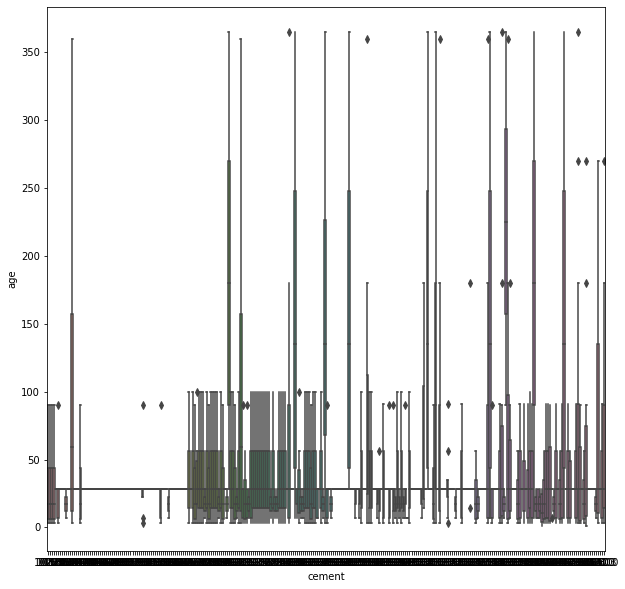

Box plot cement strength


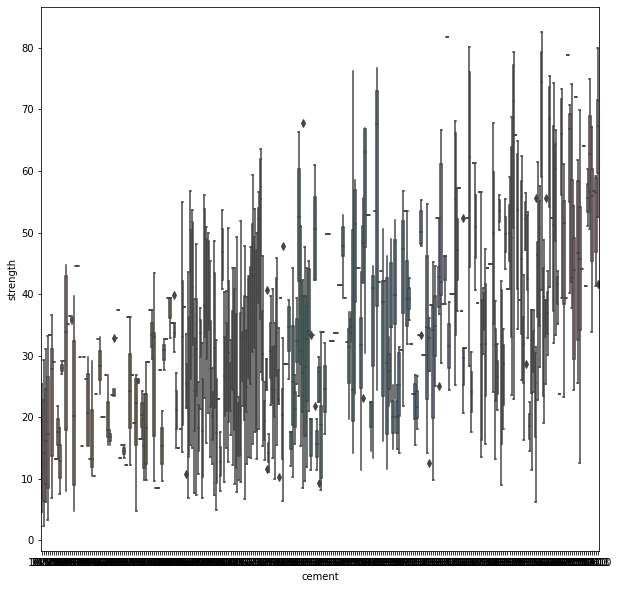

Box plot slag cement


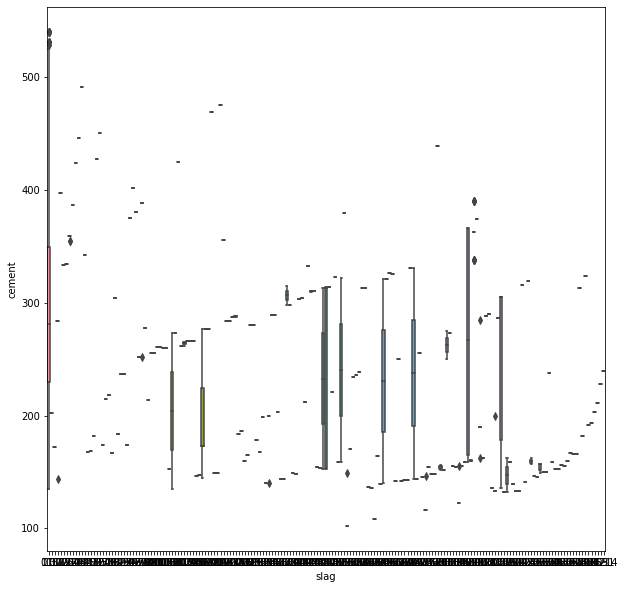

Box plot slag slag


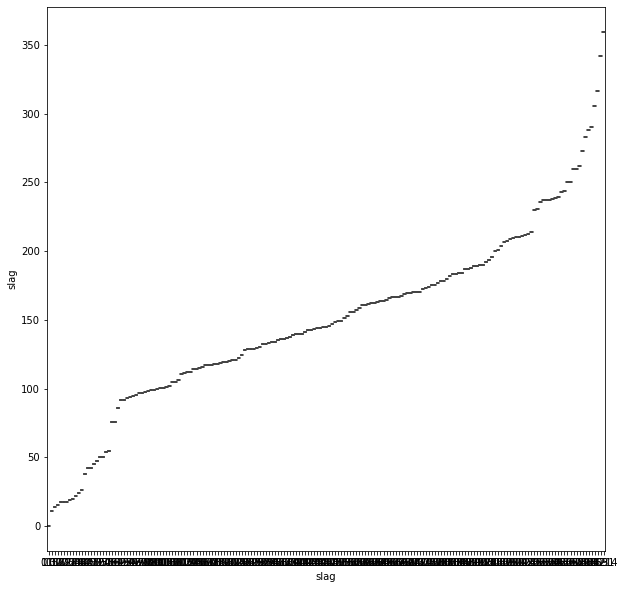

Box plot slag ash


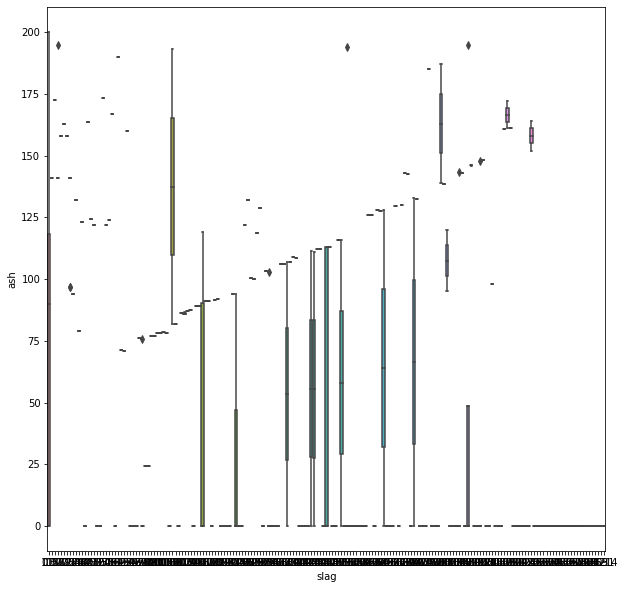

Box plot slag water


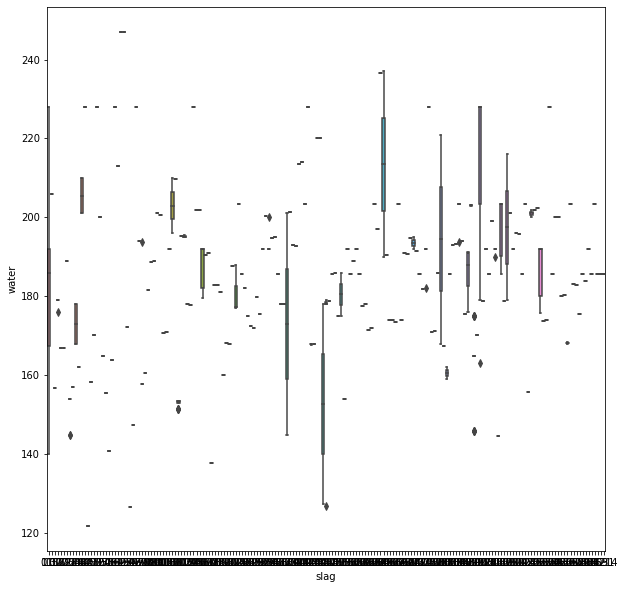

Box plot slag superplastic


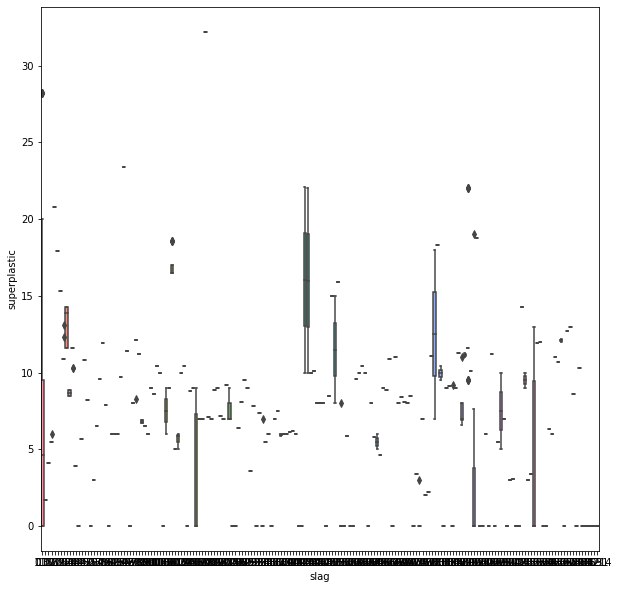

Box plot slag coarseagg


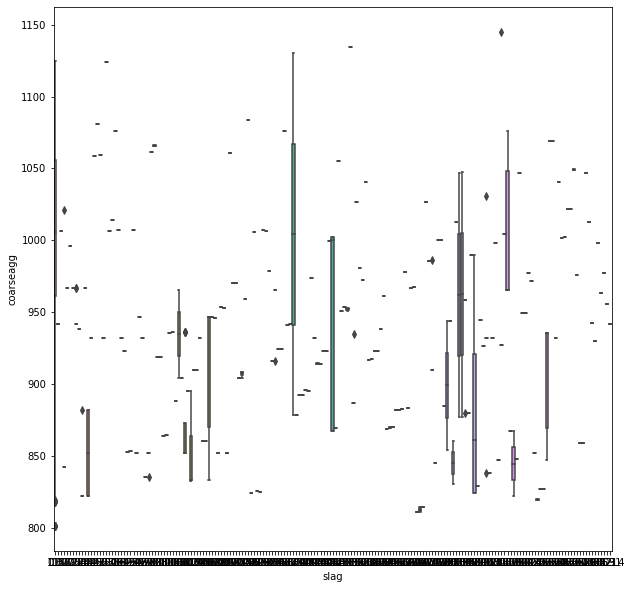

Box plot slag fineagg


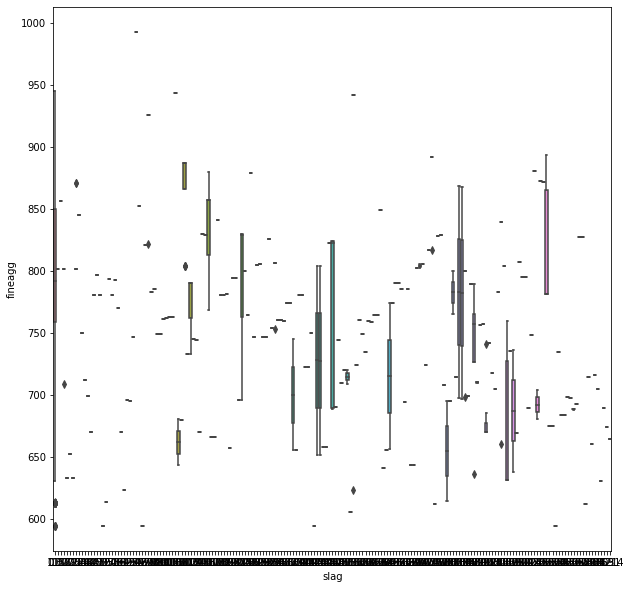

Box plot slag age


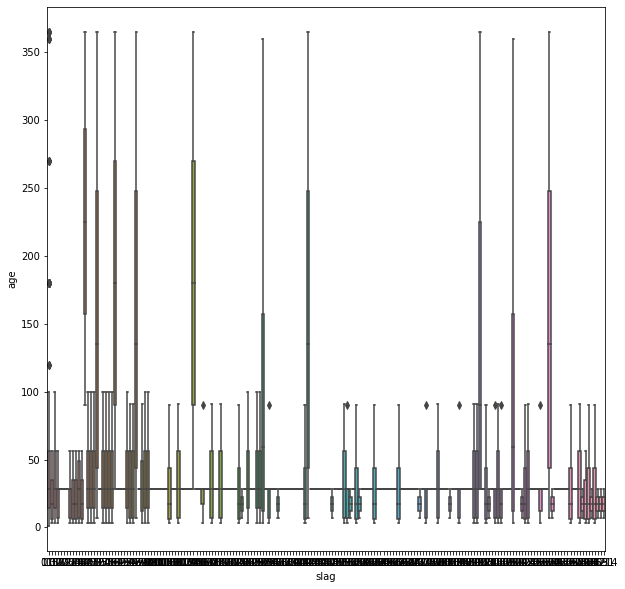

Box plot slag strength


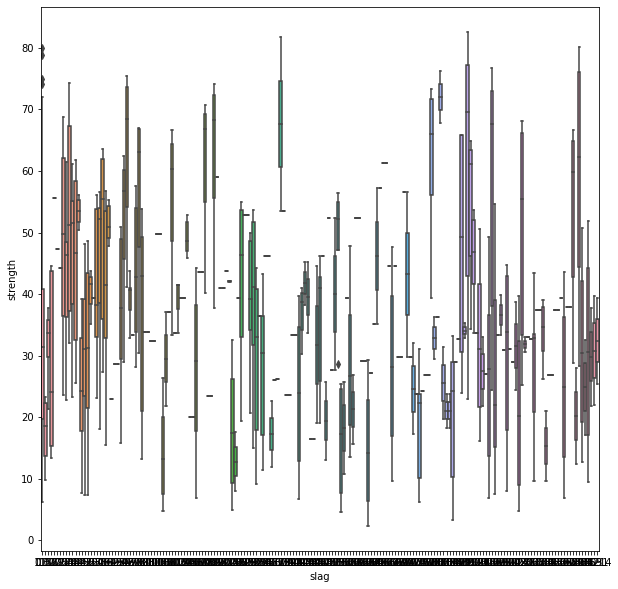

Box plot ash cement


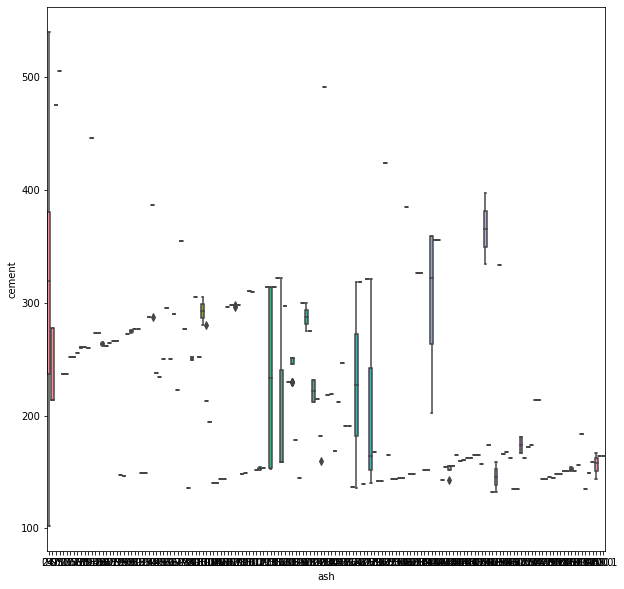

Box plot ash slag


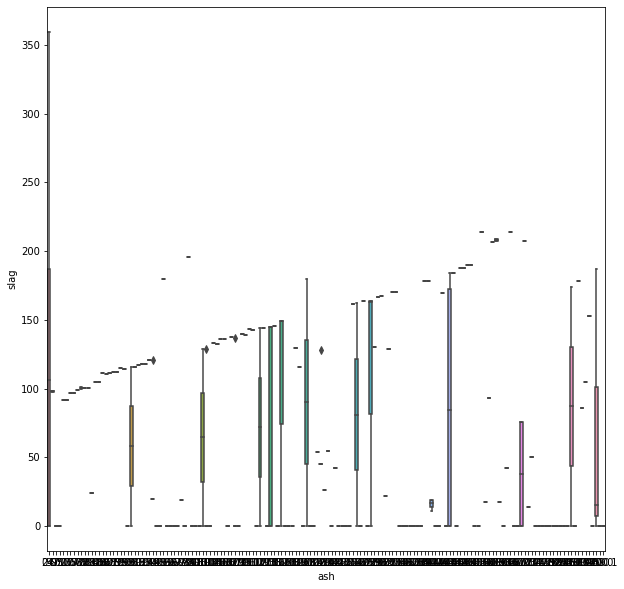

Box plot ash ash


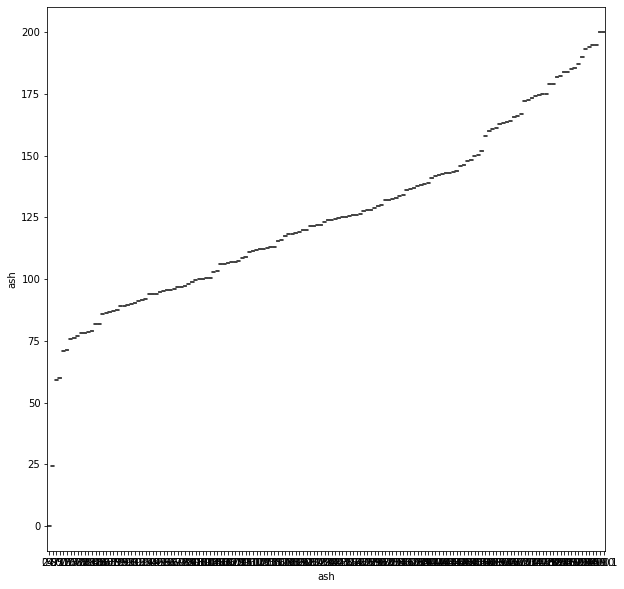

Box plot ash water


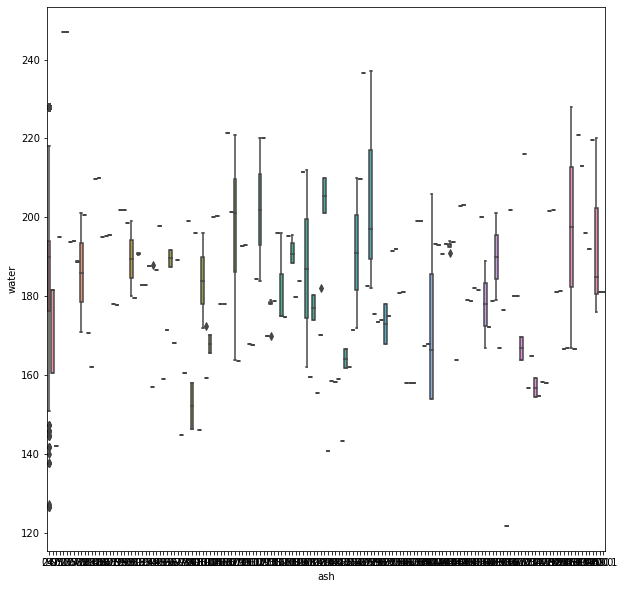

Box plot ash superplastic


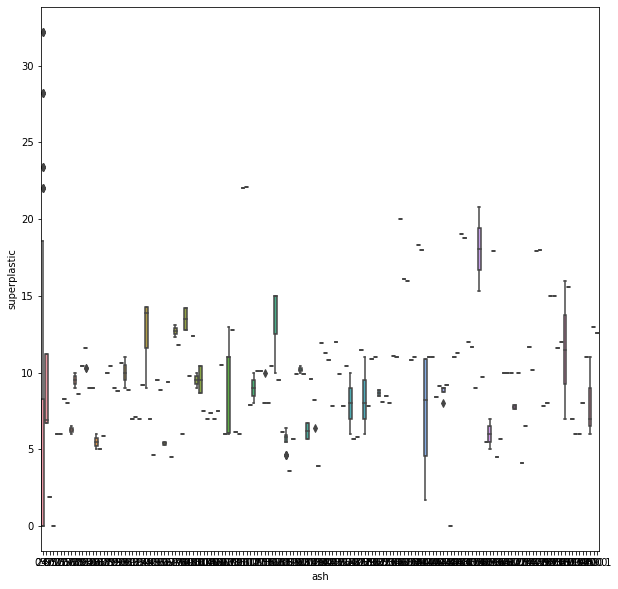

Box plot ash coarseagg


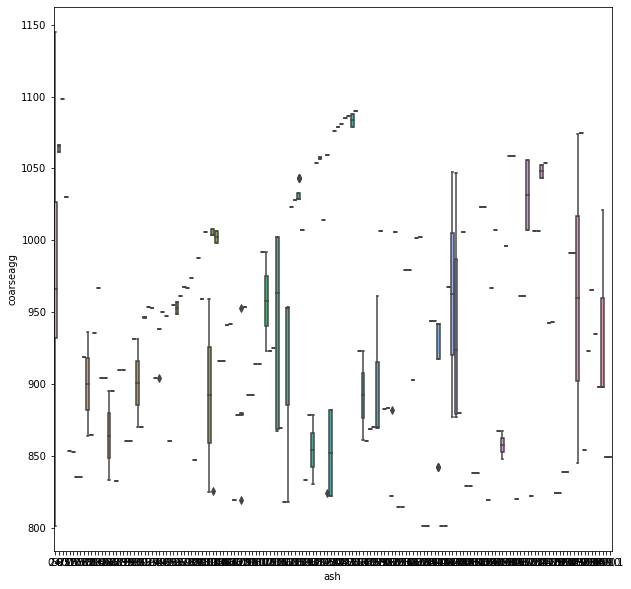

Box plot ash fineagg


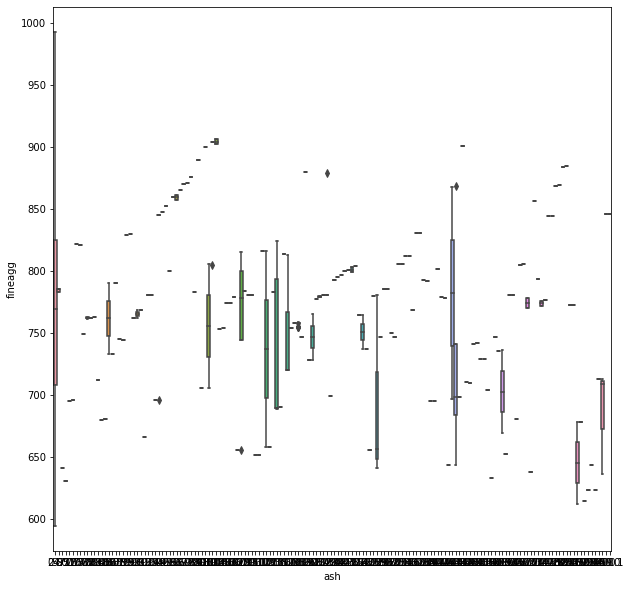

Box plot ash age


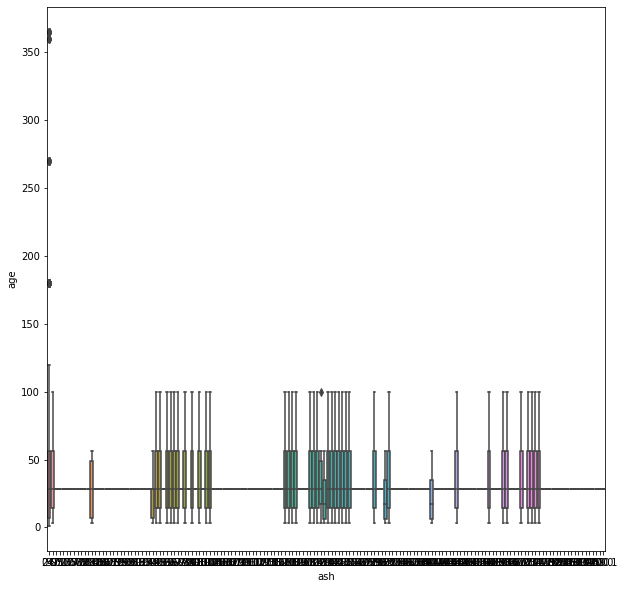

Box plot ash strength


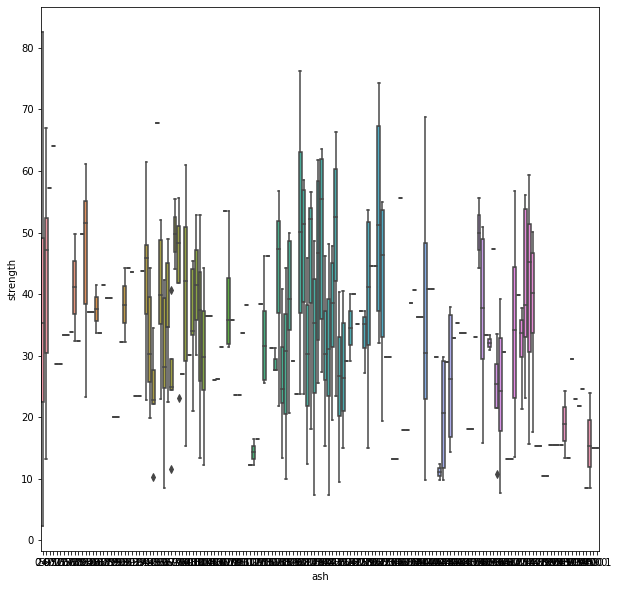

Box plot water cement


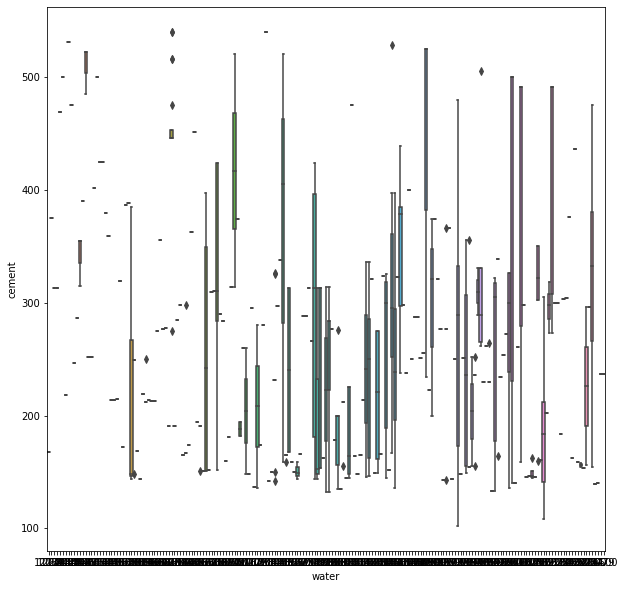

Box plot water slag


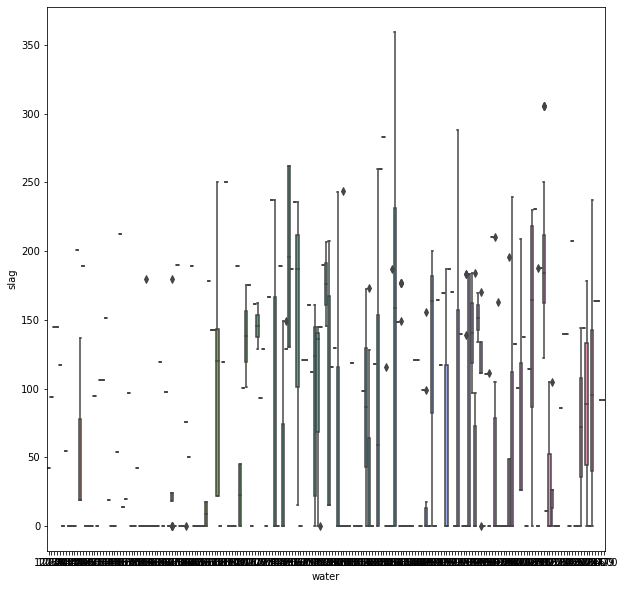

Box plot water ash


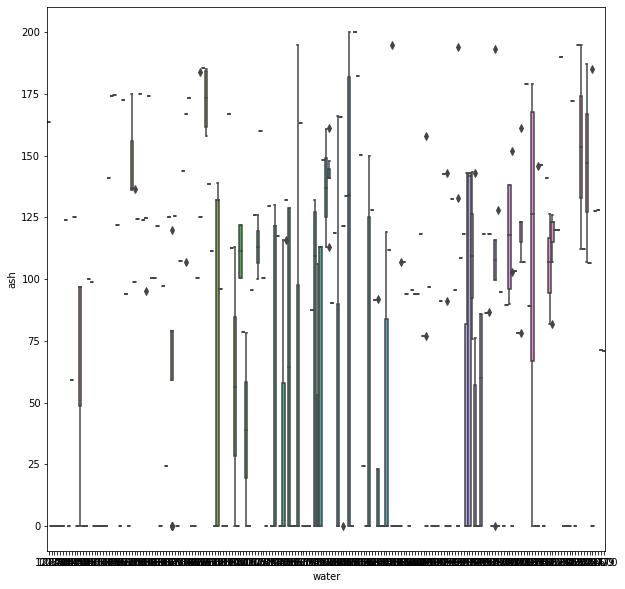

Box plot water water


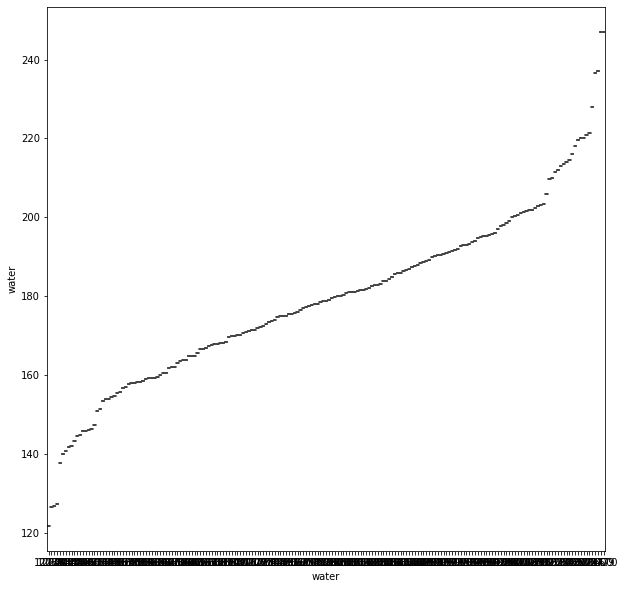

Box plot water superplastic


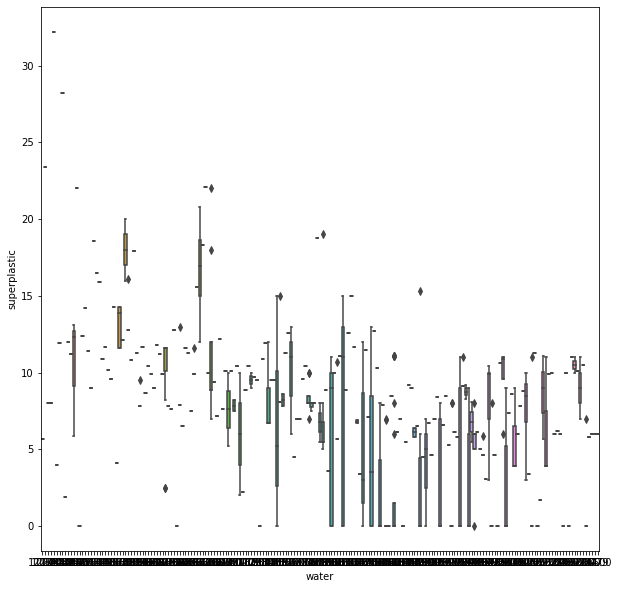

Box plot water coarseagg


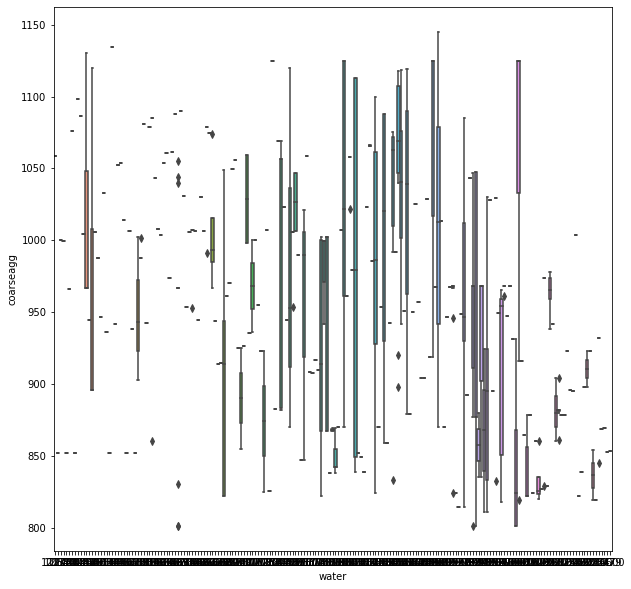

Box plot water fineagg


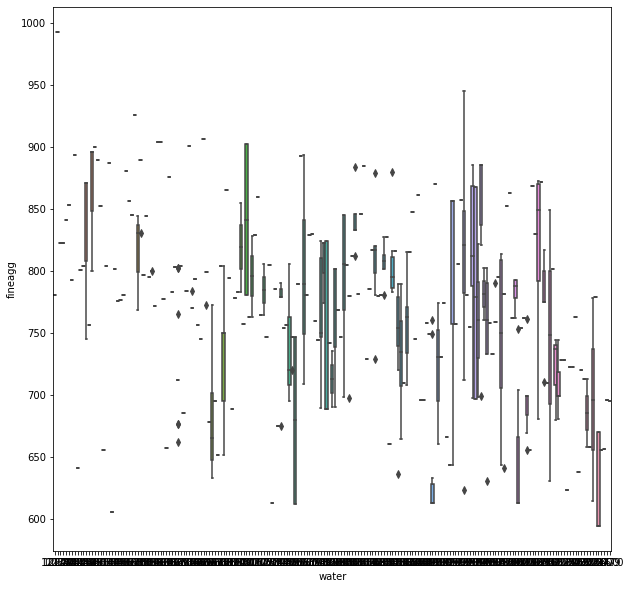

Box plot water age


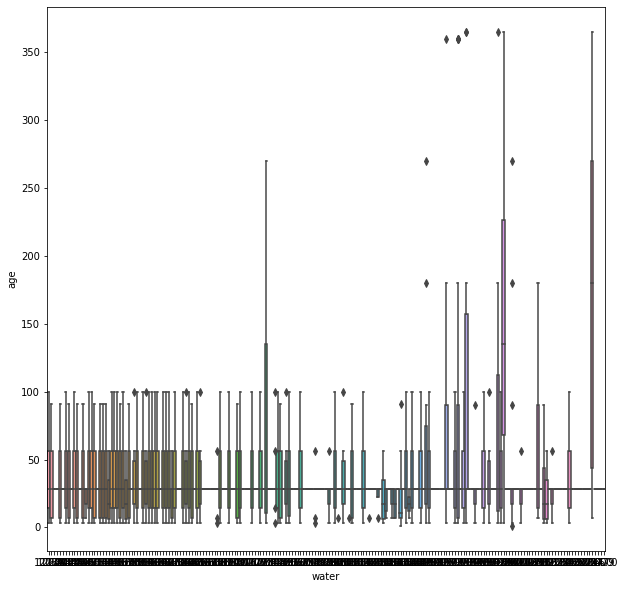

Box plot water strength


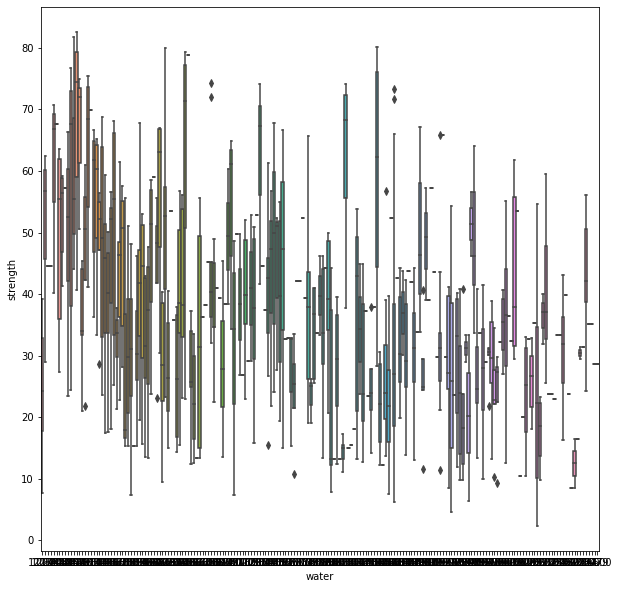

Box plot superplastic cement


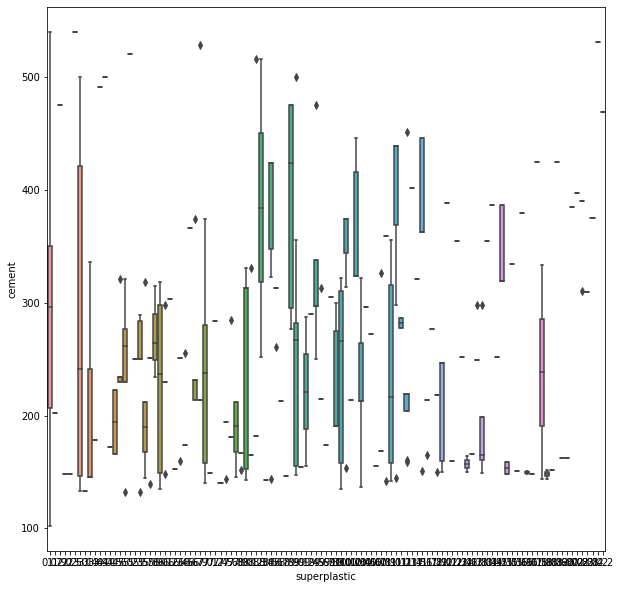

Box plot superplastic slag


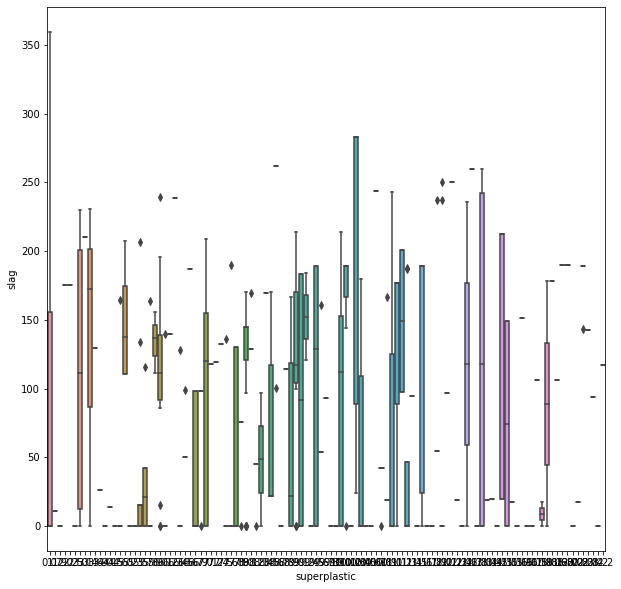

Box plot superplastic ash


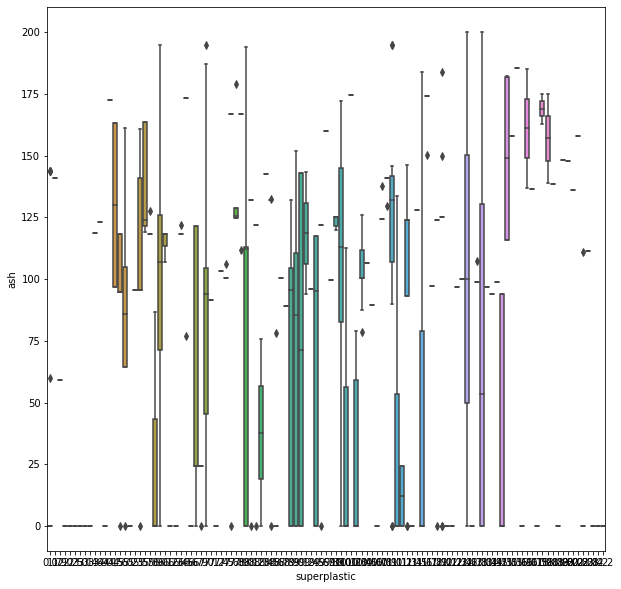

Box plot superplastic water


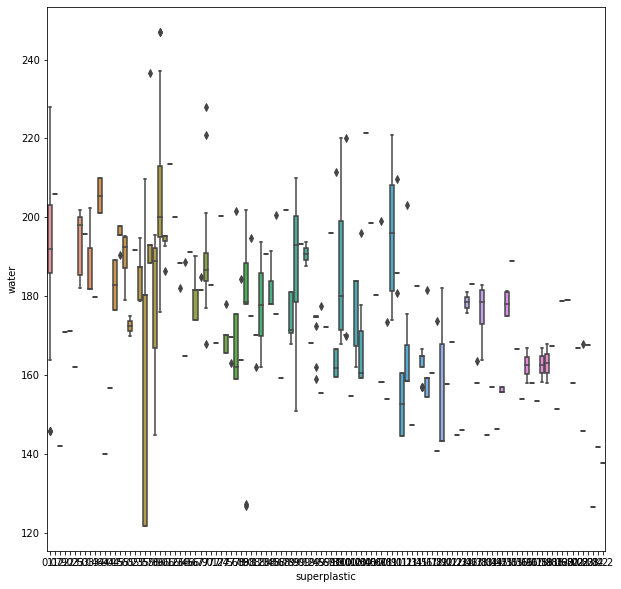

Box plot superplastic superplastic


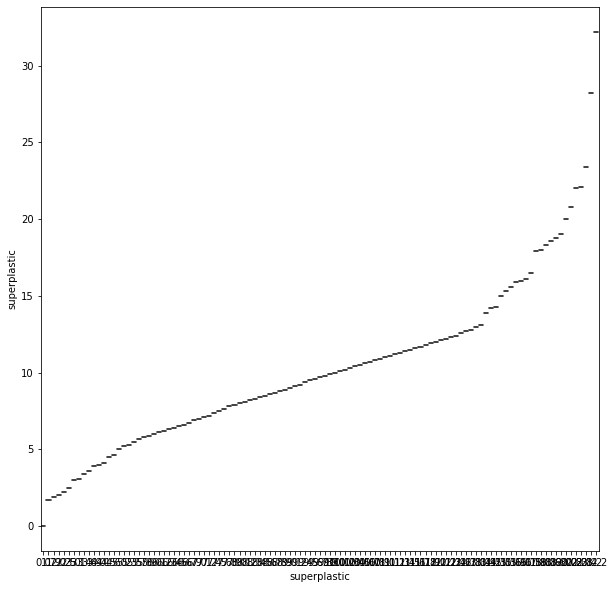

Box plot superplastic coarseagg


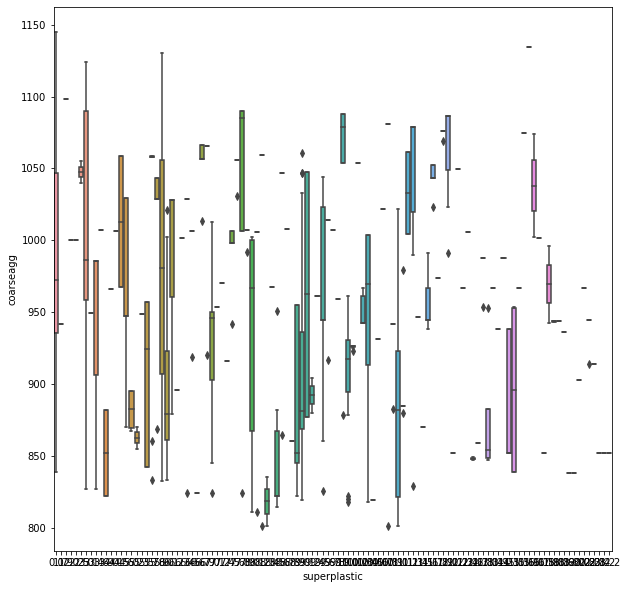

Box plot superplastic fineagg


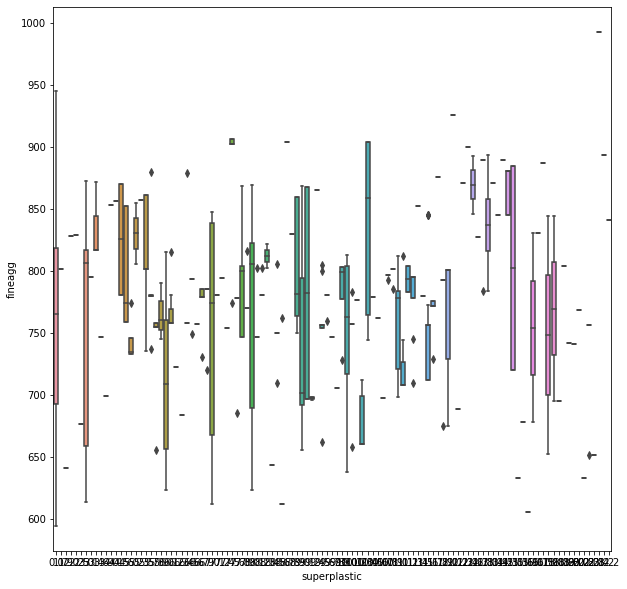

Box plot superplastic age


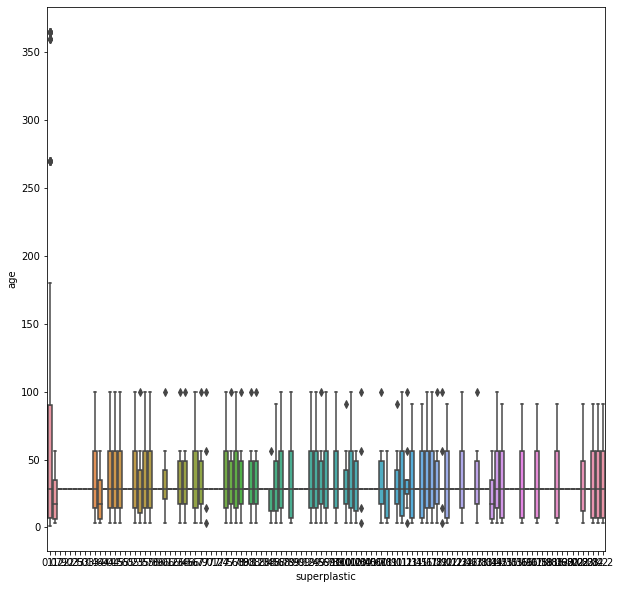

Box plot superplastic strength


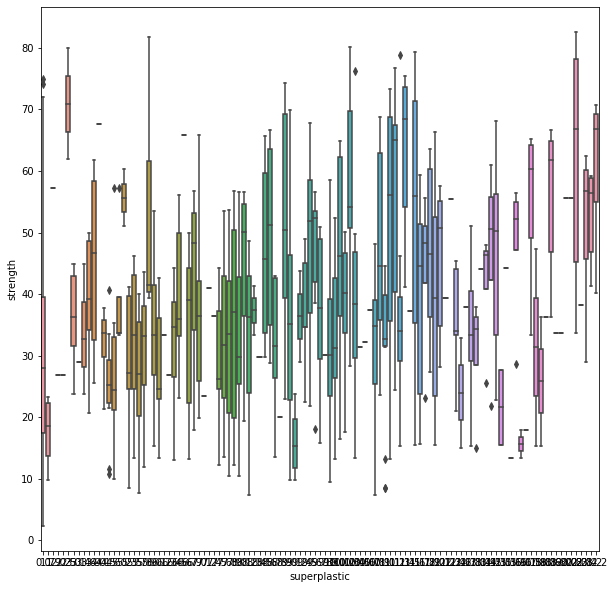

Box plot coarseagg cement


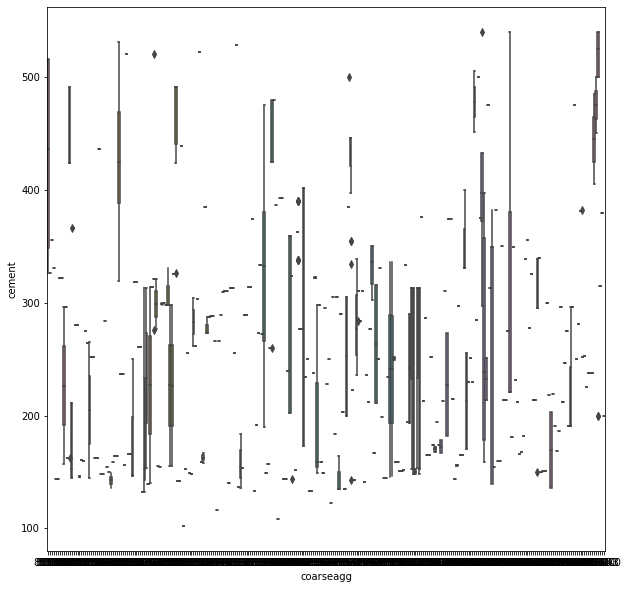

Box plot coarseagg slag


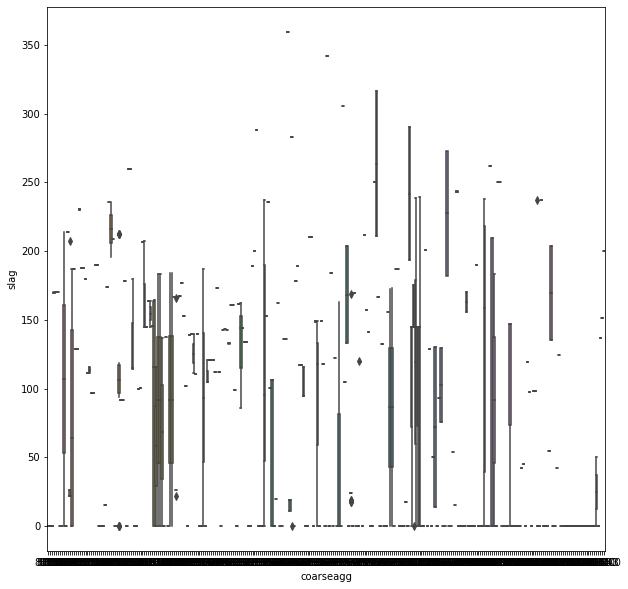

Box plot coarseagg ash


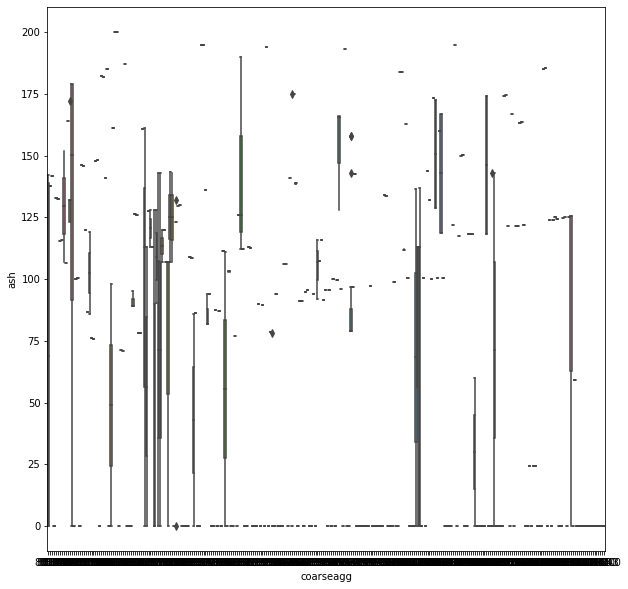

Box plot coarseagg water


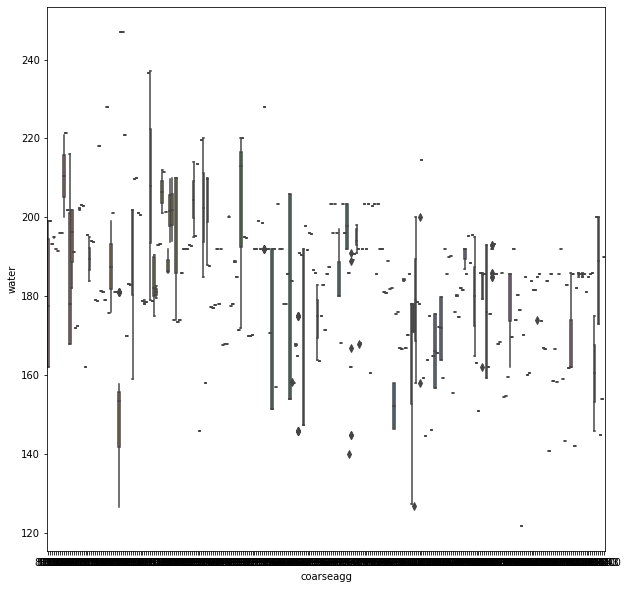

Box plot coarseagg superplastic


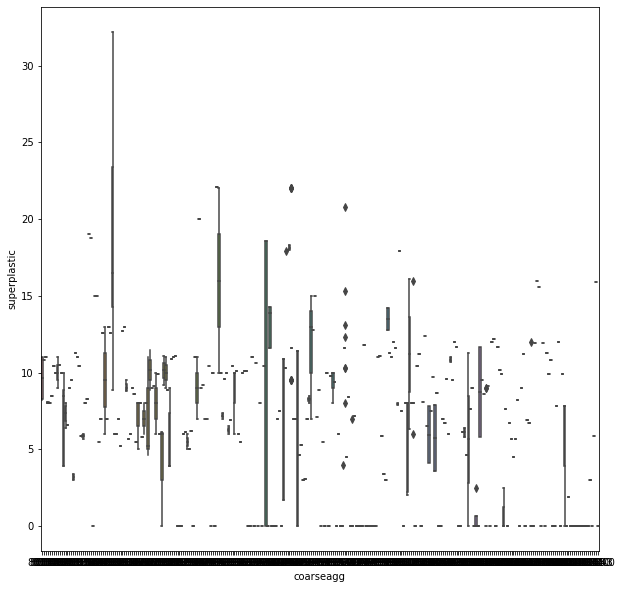

Box plot coarseagg coarseagg


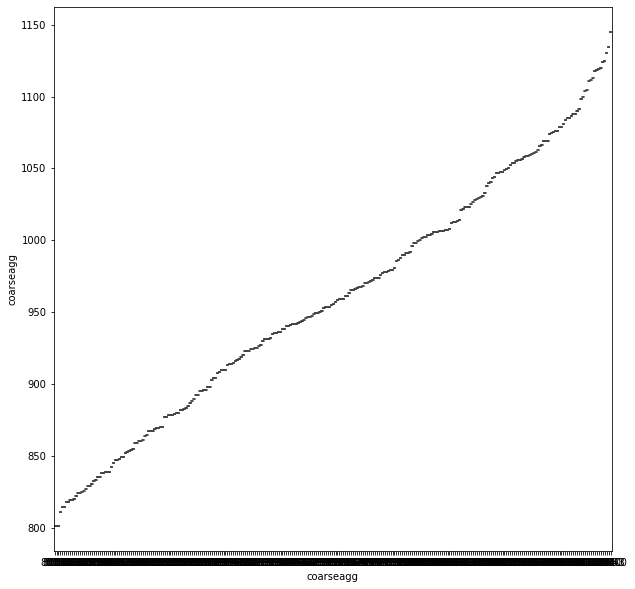

Box plot coarseagg fineagg


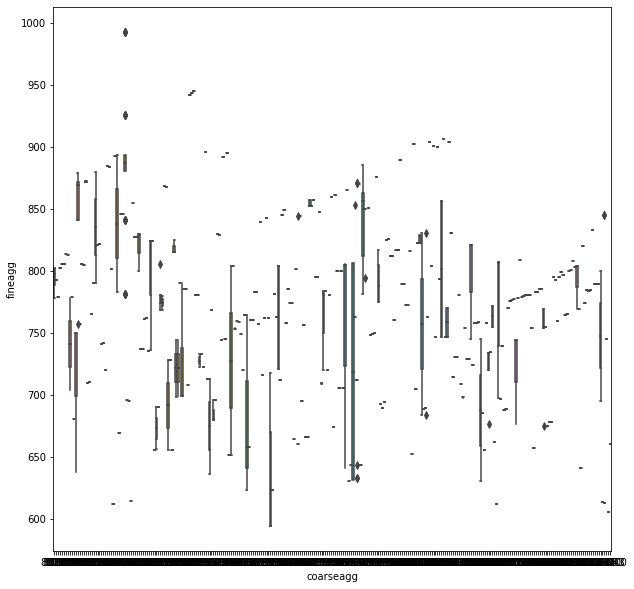

Box plot coarseagg age


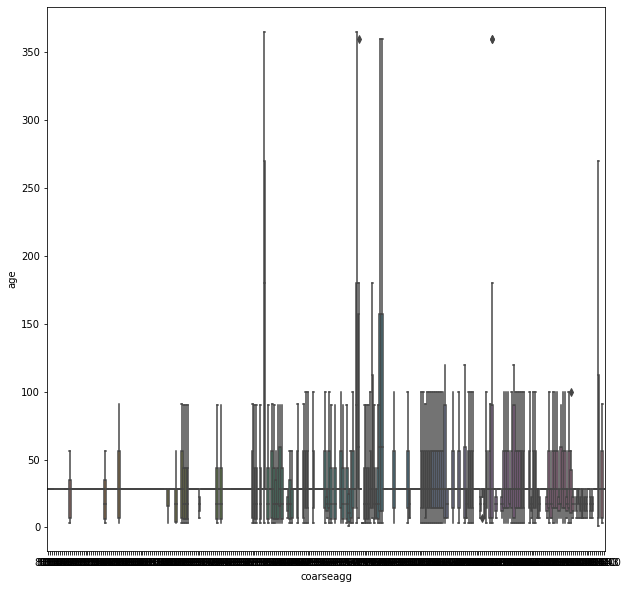

Box plot coarseagg strength


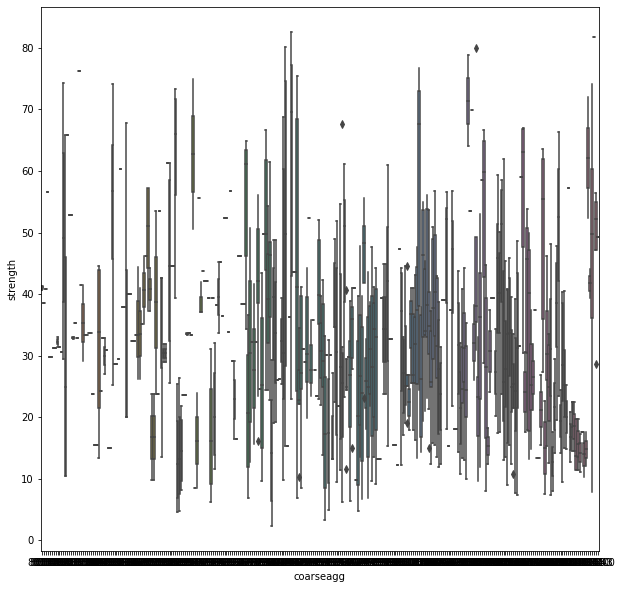

Box plot fineagg cement


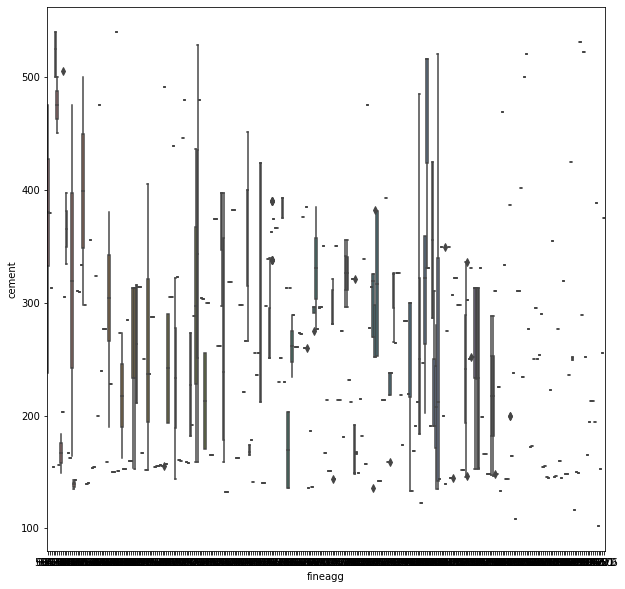

Box plot fineagg slag


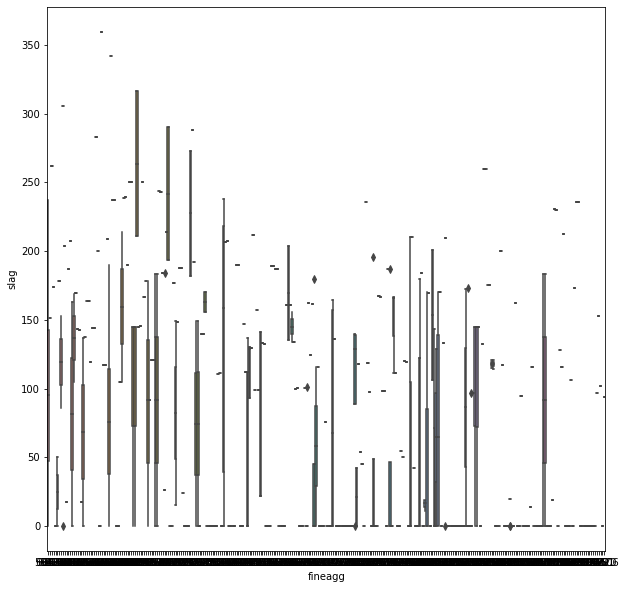

Box plot fineagg ash


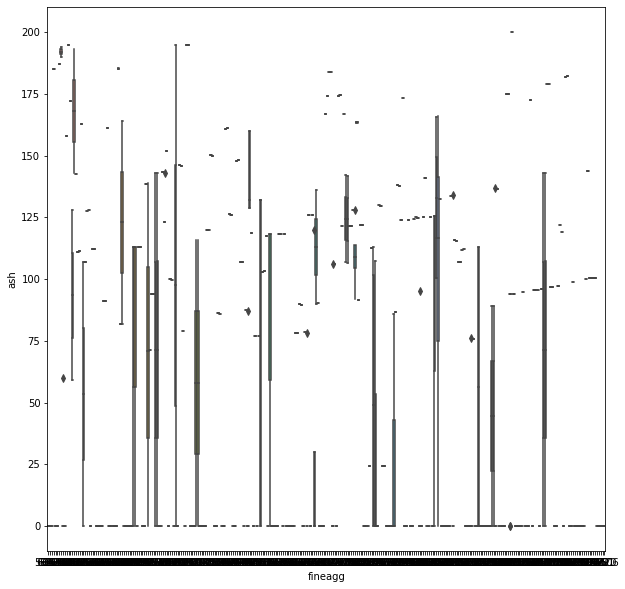

Box plot fineagg water


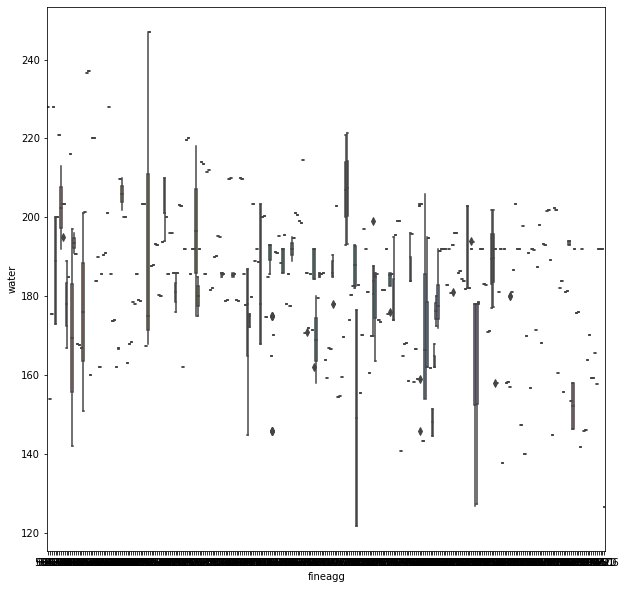

Box plot fineagg superplastic


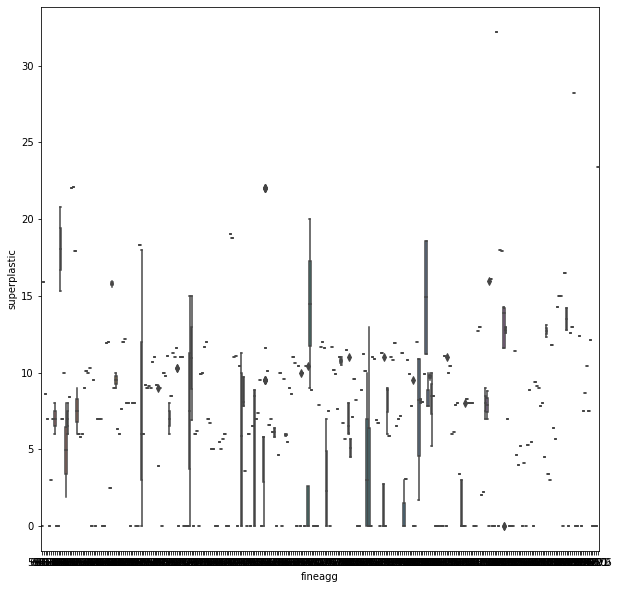

Box plot fineagg coarseagg


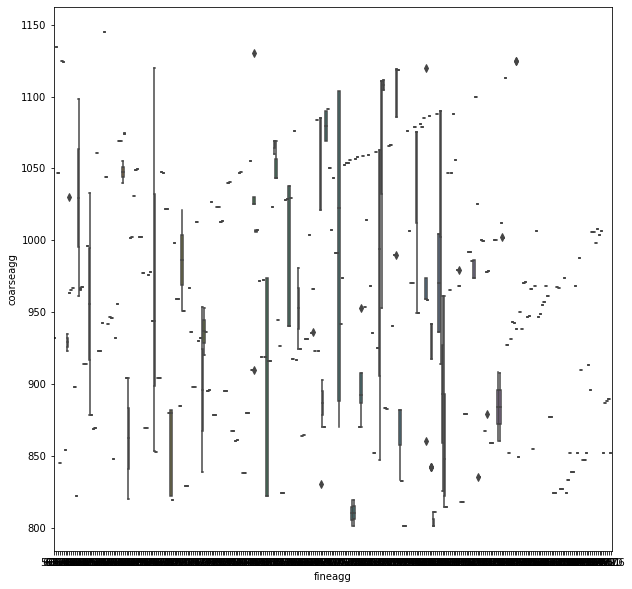

Box plot fineagg fineagg


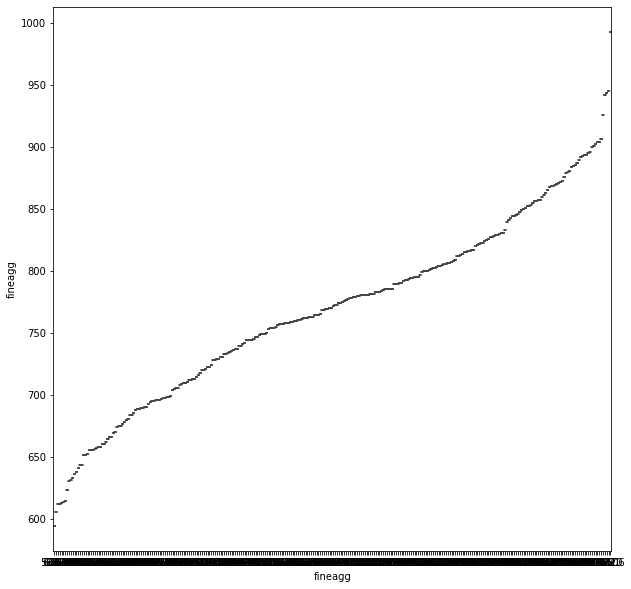

Box plot fineagg age


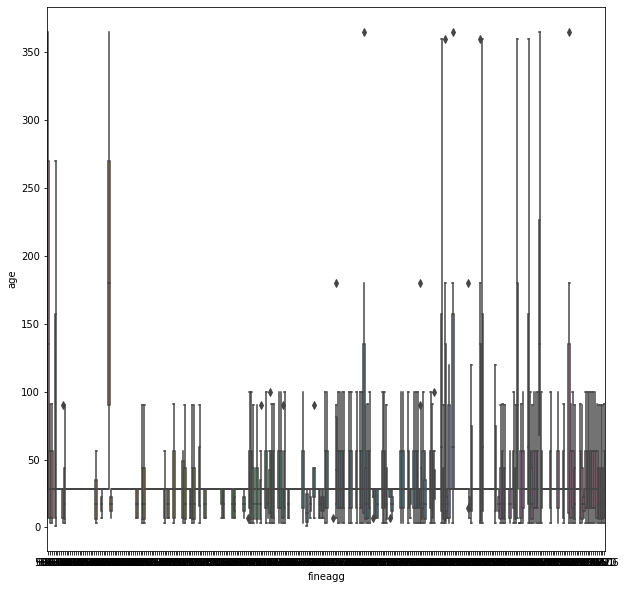

Box plot fineagg strength


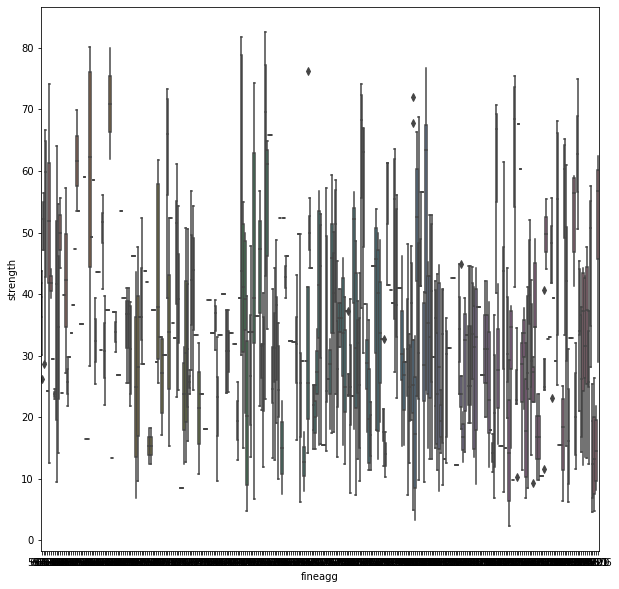

Box plot age cement


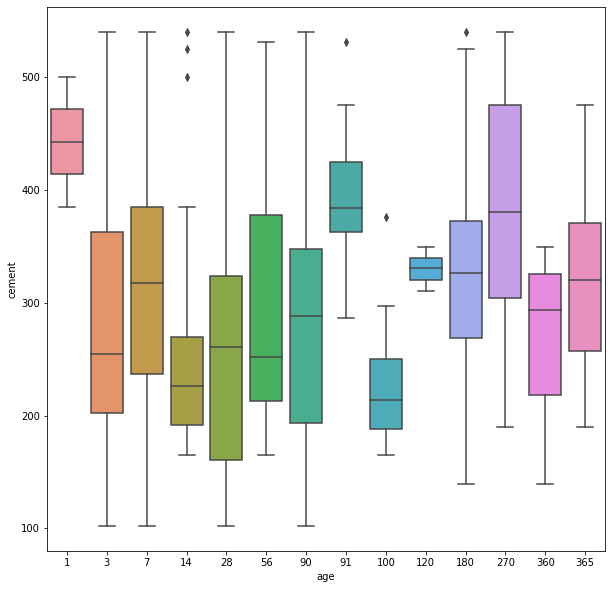

Box plot age slag


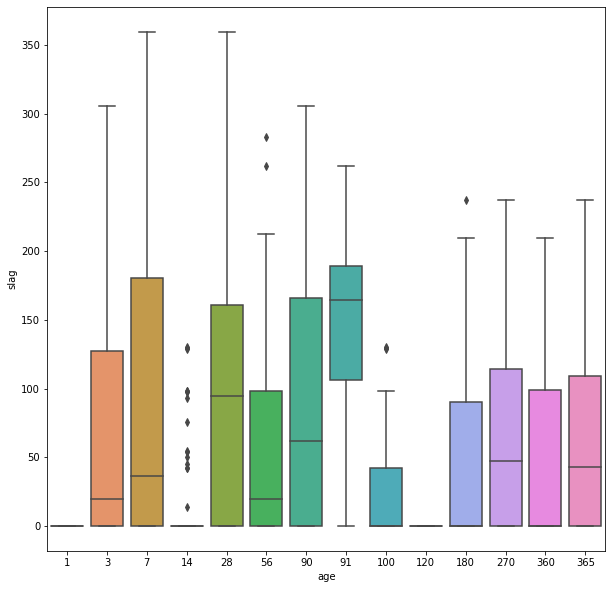

Box plot age ash


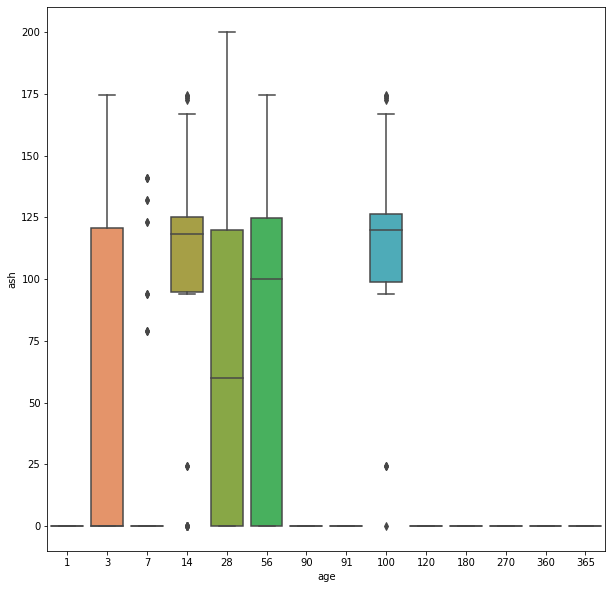

Box plot age water


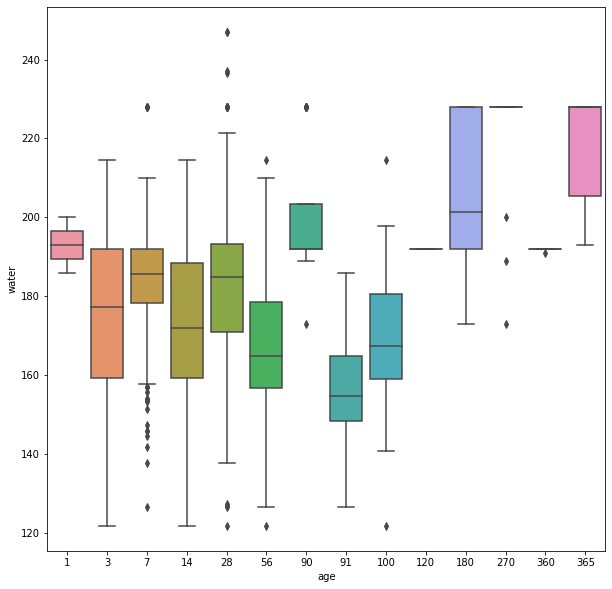

Box plot age superplastic


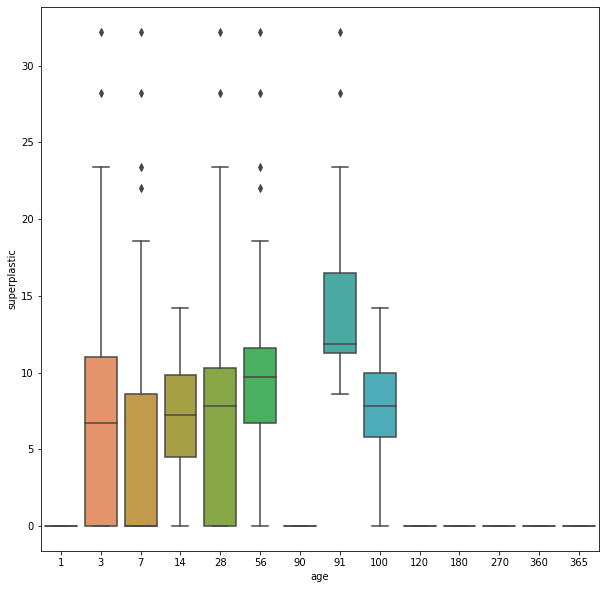

Box plot age coarseagg


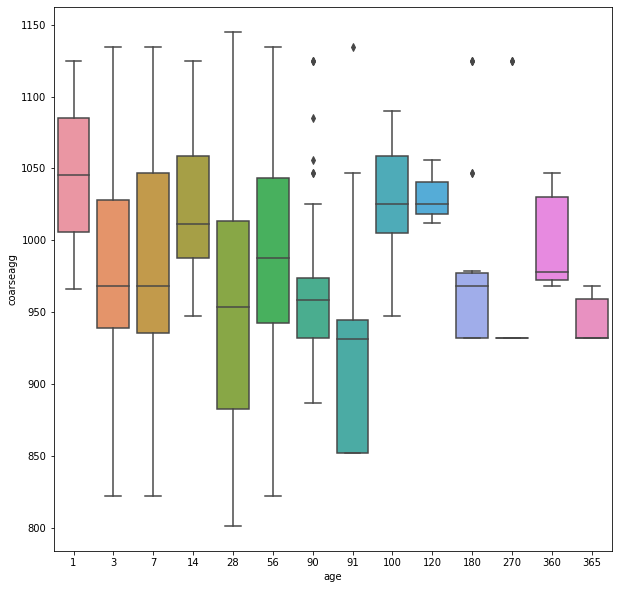

Box plot age fineagg


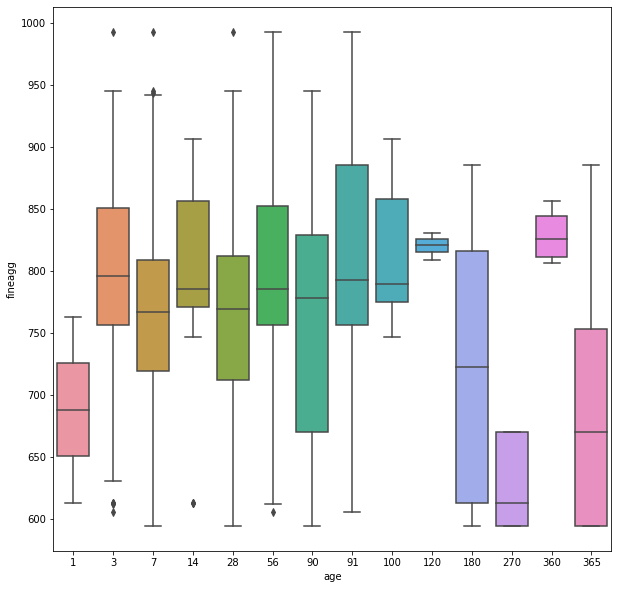

Box plot age age


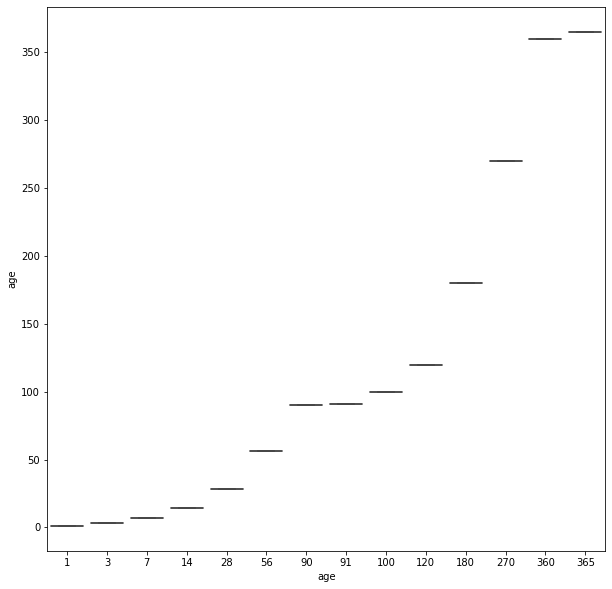

Box plot age strength


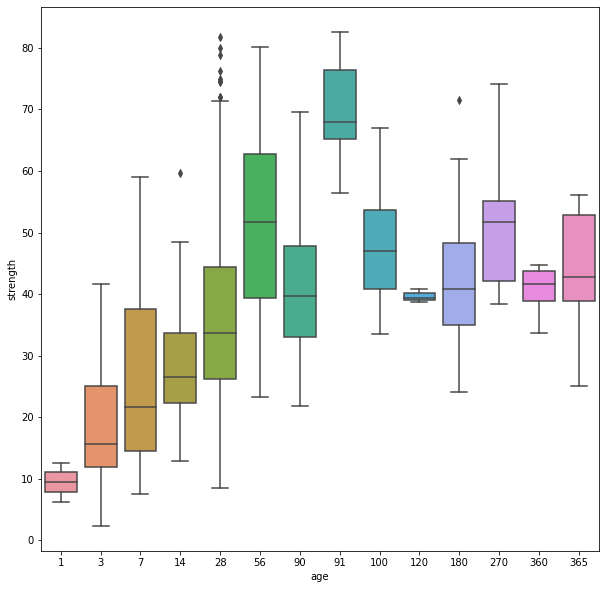

Box plot strength cement


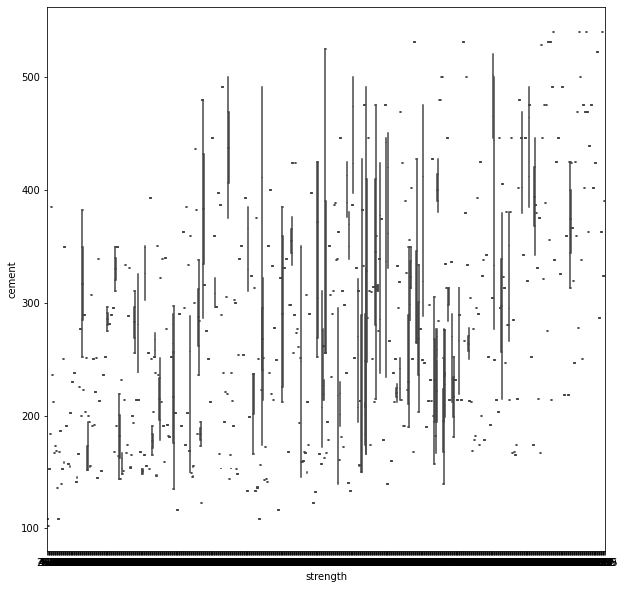

Box plot strength slag


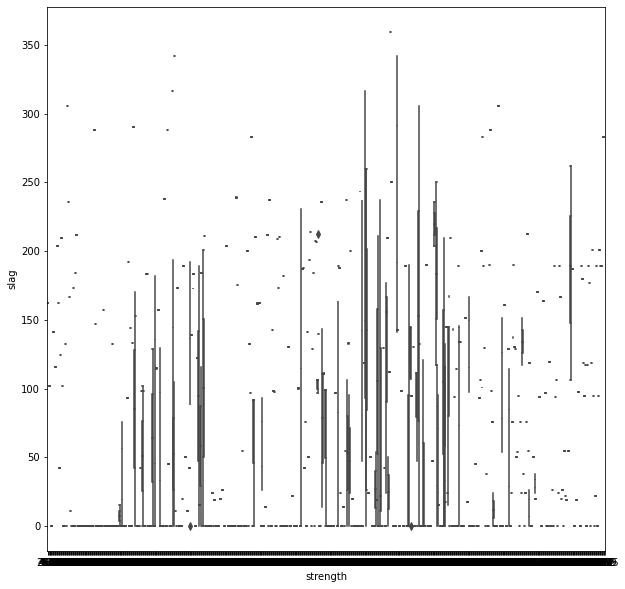

Box plot strength ash


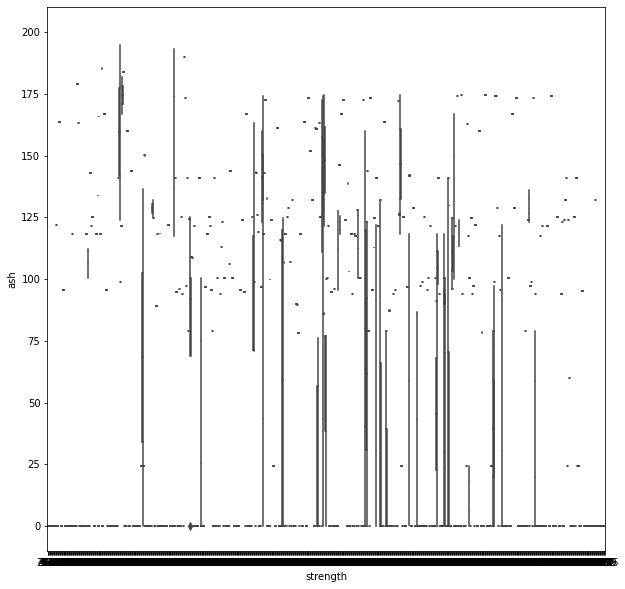

Box plot strength water


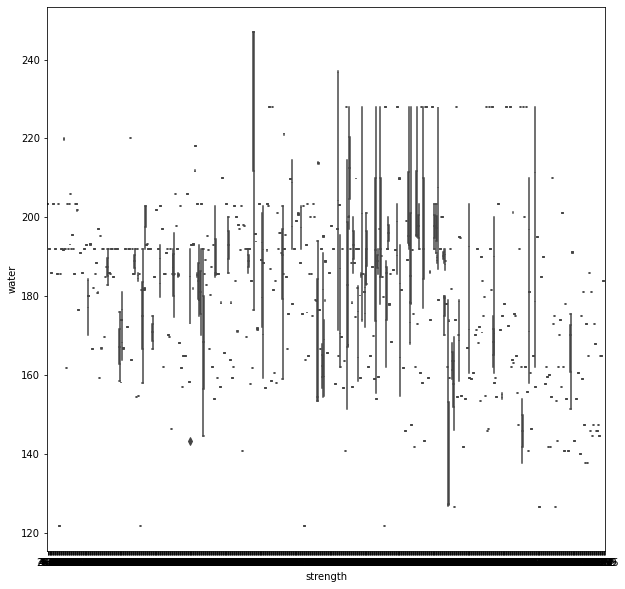

Box plot strength superplastic


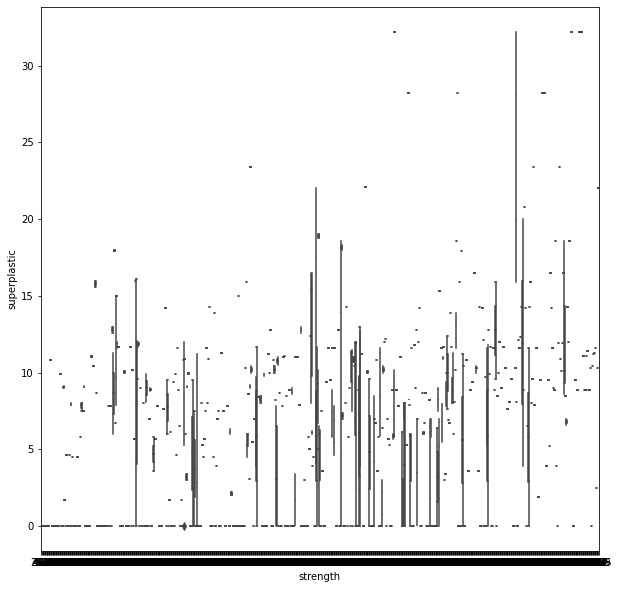

Box plot strength coarseagg


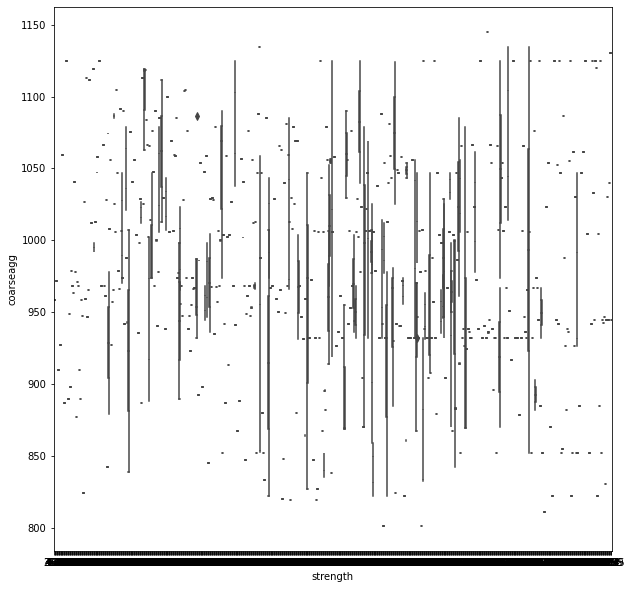

Box plot strength fineagg


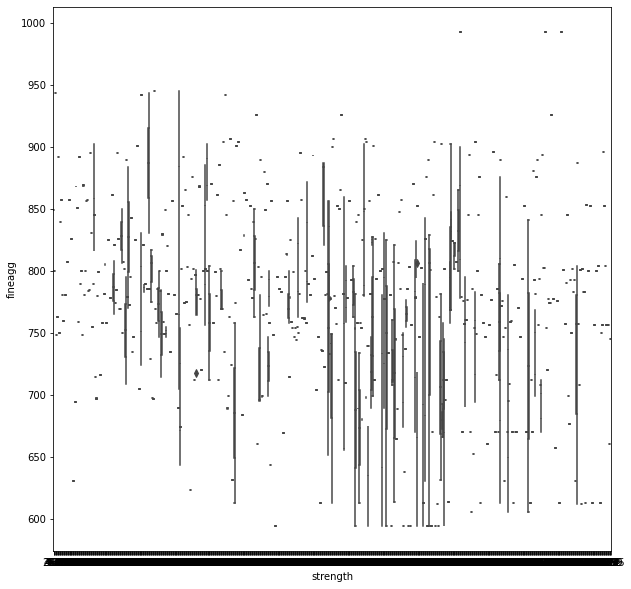

Box plot strength age


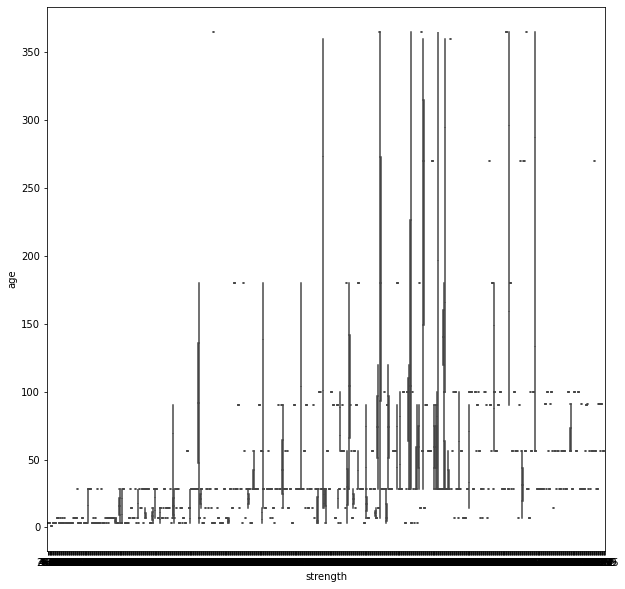

Box plot strength strength


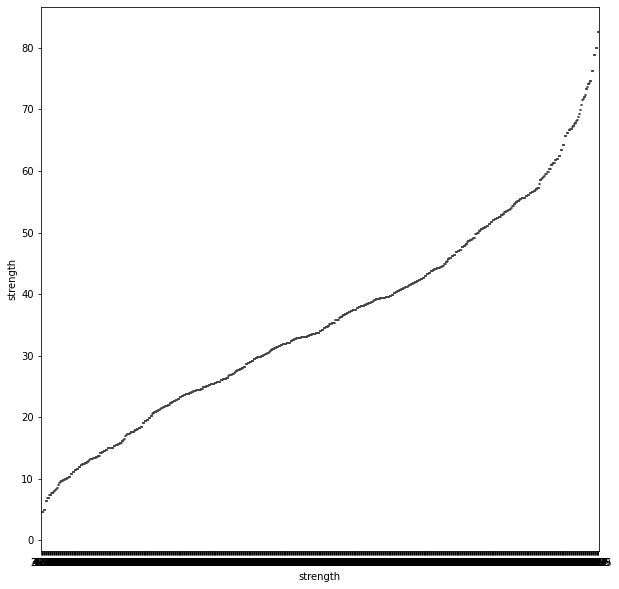

In [7]:
# Buat diagram di sini
# hanya diberi tau component name, maka dari sini saya coba semua kemungkinan
for nameColumn in data.columns:
  for nameColumnV2 in data.columns:
    print("Box plot", nameColumn, nameColumnV2)
    fig = plt.figure(figsize=(10,10))
    sns.boxplot(x=nameColumn, y=nameColumnV2, data=data)
    plt.show()


### ii. Deskripsi

Jelaskan diagram di atas

### iii. Uji Hipotesis
**Two sampled T-test** :-Uji Independent Samples t Test atau 2-sample t-test membandingkan rata-rata dua kelompok independen untuk menentukan apakah ada bukti statistik bahwa rata-rata populasi terkait berbeda secara signifikan.


In [41]:
#mencoba mencoba dengan strength
data[['strength', 'age']].groupby(['strength'], as_index=False).mean().sort_values(by='age', ascending=False)

,strength,age
595,45.84,100.0
709,56.74,100.0
678,53.90,100.0
408,33.56,100.0
686,55.02,100.0
...,...,...
118,15.62,3.0
117,15.61,3.0
0,2.33,3.0
6,6.27,1.0


In [61]:
#melakukan strength data dengan age dan strength
import random

data = data[(np.abs(stats.zscore(data["age"])) < 3)] 
strength_1 = data[data["strength"] <= 25]["age"]
strength_0 = data[data["strength"] > 25]["age"]

strength_0 = strength_0.values.tolist()
strength_0 = random.sample(strength_0, 100)
strength_1 = strength_1.values.tolist()
strength_1 = random.sample(strength_1, 100)

In [62]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(strength_1,strength_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("null hypothesis ditolak")
else:
    print("null hypothesis diterima")

ttest -7.8962553334545795
p value 8.353377282836308e-13
null hypothesis ditolak


Tentukan null dan alternate hypothesis.

    Secara umum, null hypothesis akan menyatakan bahwa kedua populasi yang diuji tidak memiliki perbedaan yang signifikan secara statistik.
    alternate hypothesis akan menyatakan bahwa ada perbedaan.

Dalam contoh ini kita dapat mengatakan bahwa:
*  Null Hypothesis :- tidak ada perbedaan Rerata usia kelompok pendapatan >50k dan kelompok pendapatan <=50k.
*  Alternate Hypothesis :- ada perbedaan Rerata usia kelompok pendapatan >50k dan kelompok pendapatan <=50k.

### iv. Kesimpulan akhir

Tulis kesimpulan akhir mengenai dataset
dapat di simpulkan bahwa perbedaan signifikan pada strength dengan > 25k dan kelompok strength <= 25 membutikan bahwa strength dapat mempengaruhi hasil akhir hipotesis